# Hello, KAN!

### Kolmogorov-Arnold representation theorem

Kolmogorov-Arnold representation theorem states that if $f$ is a multivariate continuous function
on a bounded domain, then it can be written as a finite composition of continuous functions of a
single variable and the binary operation of addition. More specifically, for a smooth $f : [0,1]^n \to \mathbb{R}$,


$$f(x) = f(x_1,...,x_n)=\sum_{q=1}^{2n+1}\Phi_q(\sum_{p=1}^n \phi_{q,p}(x_p))$$

where $\phi_{q,p}:[0,1]\to\mathbb{R}$ and $\Phi_q:\mathbb{R}\to\mathbb{R}$. In a sense, they showed that the only true multivariate function is addition, since every other function can be written using univariate functions and sum. However, this 2-Layer width-$(2n+1)$ Kolmogorov-Arnold representation may not be smooth due to its limited expressive power. We augment its expressive power by generalizing it to arbitrary depths and widths.

### Kolmogorov-Arnold Network (KAN)

The Kolmogorov-Arnold representation can be written in matrix form

$$f(x)={\bf \Phi}_{\rm out}\circ{\bf \Phi}_{\rm in}\circ {\bf x}$$

where 

$${\bf \Phi}_{\rm in}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n}(\cdot) \\ \vdots & & \vdots \\ \phi_{2n+1,1}(\cdot) & \cdots & \phi_{2n+1,n}(\cdot) \end{pmatrix},\quad {\bf \Phi}_{\rm out}=\begin{pmatrix} \Phi_1(\cdot) & \cdots & \Phi_{2n+1}(\cdot)\end{pmatrix}$$

We notice that both ${\bf \Phi}_{\rm in}$ and ${\bf \Phi}_{\rm out}$ are special cases of the following function matrix ${\bf \Phi}$ (with $n_{\rm in}$ inputs, and $n_{\rm out}$ outputs), we call a Kolmogorov-Arnold layer:

$${\bf \Phi}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n_{\rm in}}(\cdot) \\ \vdots & & \vdots \\ \phi_{n_{\rm out},1}(\cdot) & \cdots & \phi_{n_{\rm out},n_{\rm in}}(\cdot) \end{pmatrix}$$

${\bf \Phi}_{\rm in}$ corresponds to $n_{\rm in}=n, n_{\rm out}=2n+1$, and ${\bf \Phi}_{\rm out}$ corresponds to $n_{\rm in}=2n+1, n_{\rm out}=1$.

After defining the layer, we can construct a Kolmogorov-Arnold network simply by stacking layers! Let's say we have $L$ layers, with the $l^{\rm th}$ layer ${\bf \Phi}_l$ have shape $(n_{l+1}, n_{l})$. Then the whole network is

$${\rm KAN}({\bf x})={\bf \Phi}_{L-1}\circ\cdots \circ{\bf \Phi}_1\circ{\bf \Phi}_0\circ {\bf x}$$

In constrast, a Multi-Layer Perceptron is interleaved by linear layers ${\bf W}_l$ and nonlinearities $\sigma$:

$${\rm MLP}({\bf x})={\bf W}_{L-1}\circ\sigma\circ\cdots\circ {\bf W}_1\circ\sigma\circ {\bf W}_0\circ {\bf x}$$

A KAN can be easily visualized. (1) A KAN is simply stack of KAN layers. (2) Each KAN layer can be visualized as a fully-connected layer, with a 1D function placed on each edge. Let's see an example below.

### Get started with KANs

Initialize KAN

In [15]:
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=3, k=3, seed=42, device=device)

cuda
checkpoint directory created: ./model
saving model version 0.0


Create dataset

In [16]:
from kan.utils import create_dataset
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape,dataset['test_input'].shape,dataset['test_label'].shape

(torch.Size([1000, 2]),
 torch.Size([1000, 1]),
 torch.Size([1000, 2]),
 torch.Size([1000, 1]))

Plot KAN at initialization

In [17]:
print(dataset['train_input'])

tensor([[ 0.9401,  0.9797],
        [ 0.4156, -0.9600],
        [-0.0812, -0.1531],
        ...,
        [ 0.7357,  0.5217],
        [-0.4637, -0.7196],
        [ 0.5701, -0.4481]], device='cuda:0')


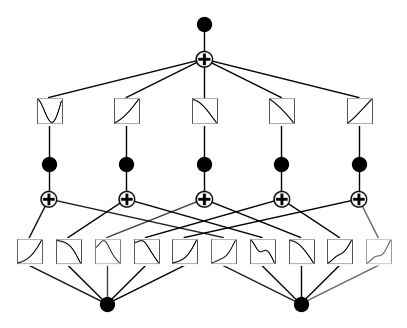

In [18]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot()

In [19]:
dataset

{'train_input': tensor([[ 0.9401,  0.9797],
         [ 0.4156, -0.9600],
         [-0.0812, -0.1531],
         ...,
         [ 0.7357,  0.5217],
         [-0.4637, -0.7196],
         [ 0.5701, -0.4481]], device='cuda:0'),
 'test_input': tensor([[-0.5624,  0.5904],
         [ 0.2209, -0.0834],
         [-0.0159,  0.0811],
         ...,
         [-0.4784,  0.6921],
         [ 0.2671, -0.2259],
         [ 0.2627, -0.0458]], device='cuda:0'),
 'train_label': tensor([[3.1481],
         [6.5976],
         [0.7953],
         [3.4230],
         [3.8323],
         [2.8803],
         [0.4949],
         [0.4471],
         [1.6879],
         [0.7747],
         [1.3055],
         [0.8055],
         [0.4544],
         [2.3354],
         [1.0084],
         [1.1847],
         [1.0150],
         [0.4204],
         [2.3784],
         [2.6542],
         [0.6557],
         [6.4748],
         [0.6450],
         [1.3893],
         [0.3861],
         [1.9856],
         [2.6840],
         [3.1836],
         [

Train KAN with sparsity regularization

In [20]:
# train the model
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 2.03e-02 | test_loss: 2.02e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:15<00:00,  3.17it

saving model version 0.1


Plot trained KAN

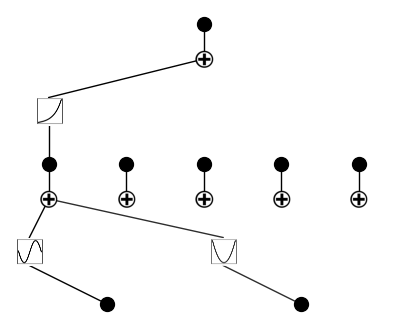

In [21]:
model.plot()

Prune KAN and replot

saving model version 0.2


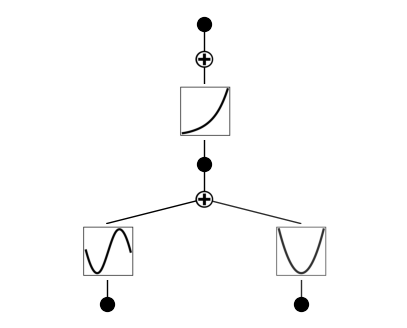

In [7]:
model = model.prune()
model.plot()

Continue training and replot

In [8]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 1.77e-02 | test_loss: 1.70e-02 | reg: 8.02e+00 | : 100%|█| 50/50 [00:12<00:00,  3.89it

saving model version 0.3


In [8]:
model = model.refine(10)

saving model version 0.4


In [9]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 4.67e-04 | test_loss: 4.73e-04 | reg: 7.66e+00 | : 100%|█| 50/50 [00:06<00:00,  7.37it

saving model version 0.5


Automatically or manually set activation functions to be symbolic

In [10]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999999188529035, c=2
fixing (0,1,0) with x^2, r2=0.9999999809840728, c=2
fixing (1,0,0) with exp, r2=0.9999999904907739, c=2
saving model version 0.6


Continue training till machine precision

In [11]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 3.33e-10 | test_loss: 7.20e-11 | reg: 0.00e+00 | : 100%|█| 50/50 [00:02<00:00, 24.56it


saving model version 0.7


Obtain the symbolic formula

In [12]:
from kan.utils import ex_round

ex_round(model.symbolic_formula()[0][0],4)

1.0*exp(1.0*x_2**2 + 1.0*sin(3.1416*x_1))